In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
dir_events = LoadOneFileUproot("/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/2/gen.root", name_branch="SNEvents",return_list=False)
# dir_events = LoadOneFileUproot("/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/0/10/0/gen.root", name_branch="SNEvents",return_list=False)
dir_readout = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_2.root", name_branch="evtTruth",return_list=False)
# dir_readout = LoadOneFileUproot("/afs/ihep.ac.cn/users/j/junotemp006/junotemp006/SNtruth/sn_intp2013.data/0/dist10/filelist_0.root", name_branch="evtTruth",return_list=False)


In [3]:
import pandas as pd
from NumpyTools import Replace
v_pdgID = []
for arr_pdgID in  dir_events["evt"]["pdgid"]:
    v_pdgID.append( tuple(arr_pdgID) )
v_pdgID_str = Replace( v_pdgID, {(2212,0):"pES", (22,0):"C12", (11,0):"eES", (-11, 2112):"IBD", (11,-11):"N12", (-11, 11):"B12"})
from collections import Counter


In [4]:
df_generator = pd.DataFrame.from_dict( Counter(v_pdgID_str), orient="index" )
df_generator =  df_generator.rename( {0:"Generator"}, axis=1 )

df_readout = pd.DataFrame.from_dict( Counter( Replace(dir_readout["evtType"], {"IBDp":"IBD", "IBDd":"IBD"} )) , orient="index" )
df_readout =  df_readout.rename( {0:"Readout"}, axis=1 )

df_comparison = pd.concat( (df_generator, df_readout), axis=1)
df_comparison


,Generator,Readout
pES,6248.0,1791
C12,325.0,304
eES,286.0,271
IBD,7254.0,14018
N12,145.0,279
B12,90.0,172
AfterPulse,NaN,2429
pileUp,NaN,327


[75.22517    0.4964695 25.777508  ... 34.42951   25.918495  39.593876 ]


(0.0, 10.0)

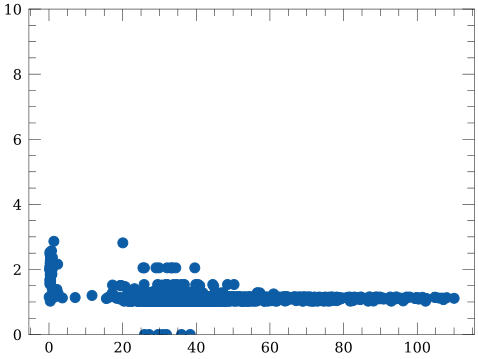

In [5]:
import seaborn as sns
df_evt = pd.DataFrame.from_dict( dir_readout )
index_AP = np.where( df_evt["evtType"]=="AfterPulse" )[0]
print( np.array( df_evt["recE"][index_AP-1]) )
plt.scatter( np.array( df_evt["recE"][index_AP-1] ), np.array( df_evt["TriggerTimeInterval"][index_AP]/1e3 ))
plt.ylim( 0, 10)
# plt.semilogy()
# sns.histplot(x="TriggerTimeInterval", data=df_evt[df_evt["evtType"]=="AfterPulse"])

Text(0.5, 1.0, 'Hits Contribution of Events')

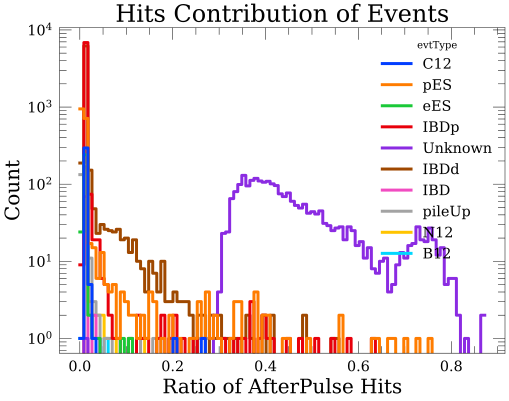

In [6]:
# plt.hist(df_evt["ratioAP"][index_AP], bins=100)
df_evt["evtType"] = df_evt["evtType"].replace( {"AfterPulse":"Unknown"})
sns.histplot(x="ratioAP", data=df_evt, hue="evtType",fill=False, element="step",bins=100, palette="bright")
plt.semilogy()
plt.xlabel("Ratio of AfterPulse Hits")
plt.title("Hits Contribution of Events")

In [7]:
index = np.where(df_evt["TriggerTimeInterval"]==0)[0][1:]
print(index)
print( list( zip( df_evt["evtType"][index], df_evt["evtType"][index-1]) ) )
pd.concat( (df_evt["TriggerTime"][index].reset_index()-df_evt["TriggerTime"][index-1].reset_index(),
                    df_evt["TriggerTime"][index-2].reset_index(),df_evt["TriggerTime"][index-1].reset_index(),
            df_evt["TriggerTime"][index].reset_index(), df_evt["TriggerTime"][index+1].reset_index(),
            df_evt["fileNo"][index].reset_index(), df_evt["entryCalib"][index].reset_index()  ),axis=1 )


[  612  1359  2121  2858  3624  4409  5204  5993  6779  7580  8401  9197
 10033 10790 11440 12118 12729 13342 13989 14597 15170 15754 16324 16884
 17498 18057 18640 19188 19274 19287 19300 19329 19340 19386 19501 19517]
[('IBDp', 'B12'), ('IBDp', 'N12'), ('IBDp', 'B12'), ('IBDp', 'B12'), ('pES', 'Unknown'), ('pES', 'B12'), ('pES', 'B12'), ('N12', 'B12'), ('B12', 'B12'), ('pES', 'B12'), ('C12', 'N12'), ('pES', 'B12'), ('IBDp', 'N12'), ('IBDp', 'B12'), ('pES', 'IBDd'), ('pES', 'N12'), ('IBDp', 'pES'), ('IBDp', 'pES'), ('IBDp', 'IBDd'), ('IBDp', 'IBDd'), ('pES', 'N12'), ('IBDp', 'B12'), ('IBDp', 'pES'), ('IBDp', 'pES'), ('pES', 'IBDd'), ('IBDp', 'IBDd'), ('IBDp', 'C12'), ('IBDp', 'IBDd'), ('Unknown', 'IBDp'), ('Unknown', 'IBDp'), ('Unknown', 'IBDp'), ('IBDd', 'IBDp'), ('Unknown', 'IBDp'), ('Unknown', 'IBDp'), ('Unknown', 'IBDp'), ('Unknown', 'IBDp')]


,index,TriggerTime,index,TriggerTime,index,TriggerTime,index,TriggerTime,index,TriggerTime,index,fileNo,index,entryCalib
0,1,-7.559452e+07,610,1.185688e+08,611,1.306388e+08,612,5.504429e+07,613,5.525156e+07,612,1,612,0
1,1,-2.580092e+07,1357,9.224699e+07,1358,1.085576e+08,1359,8.275672e+07,1360,8.275788e+07,1359,2,1359,0
2,1,-6.611547e+07,2119,1.592950e+08,2120,1.714225e+08,2121,1.053070e+08,2122,1.053081e+08,2121,3,2121,0
3,1,-3.776060e+07,2856,1.618441e+08,2857,1.626774e+08,2858,1.249168e+08,2859,1.249884e+08,2858,4,2858,0
4,1,-1.556402e+12,3622,2.052968e+08,3623,1.556546e+12,3624,1.446794e+08,3625,1.447020e+08,3624,5,3624,0
5,1,-6.037605e+07,4407,2.182512e+08,4408,2.252069e+08,4409,1.648308e+08,4410,1.648555e+08,4409,6,4409,0
6,1,-6.663883e+07,5202,2.186734e+08,5203,2.527555e+08,5204,1.861166e+08,5205,1.861443e+08,5204,7,5204,0
7,1,-9.273206e+07,5991,2.591181e+08,5992,3.017622e+08,5993,2.090302e+08,5994,2.090313e+08,5993,8,5993,0
8,1,-5.220529e+07,6777,2.659477e+08,6778,2.862705e+08,6779,2.340652e+08,6780,2.341083e+08,6779,9,6779,0
9,1,-1.290235e+08,7578,2.791893e+08,7579,3.919079e+08,7580,2.628844e+08,7581,2.631071e+08,7580,10,7580,0


[]

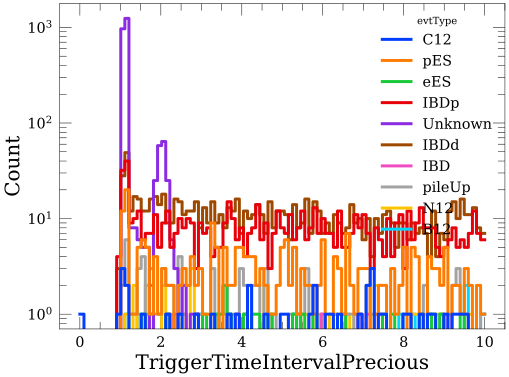

In [22]:
df_evt["TriggerTimeIntervalPrecious"] =np.concatenate( [ [0], np.array( df_evt["TriggerTime"].iloc[1:] ) - np.array( df_evt["TriggerTime"].iloc[:-1] )] )/1000
sns.histplot( x="TriggerTimeIntervalPrecious", data=df_evt, hue="evtType", bins=np.linspace(0,10,100),fill=False,element="step",
              palette="bright")
plt.semilogy()

In [8]:
df_evt[df_evt["TriggerTimeInterval"]==0]

,evtID,nuE,evtType,recE,recX,recY,recZ,ratioSN,ratioDN,ratioAP,ratioDNAP,TriggerTime,TriggerTimeInterval,fileNo,detID,entryCalib,entryGen
0,0,21.966389,C12,17.005114,4315.367188,-2648.881592,-4177.388672,0.965364,0.022193,0.012402,0.000041,1.540140e+07,0.0,0,2,0,2
612,612,16.440616,IBDp,16.721064,3466.229248,-16591.982422,3278.034424,0.963135,0.024361,0.012342,0.000162,5.504429e+07,0.0,1,0,0,500
1359,1359,31.129623,IBDp,34.752697,-1221.401489,-12487.145508,989.396606,0.975930,0.011145,0.012852,0.000073,8.275672e+07,0.0,2,0,0,1000
2121,2121,77.926905,IBDp,82.845886,-2777.398193,-5407.800293,8925.866211,0.982210,0.004926,0.012831,0.000032,1.053070e+08,0.0,3,0,0,1500
2858,2858,19.169949,IBDp,20.760994,5694.157715,-3462.351074,-10006.835938,0.968141,0.019300,0.012432,0.000127,1.249168e+08,0.0,4,0,0,2000
3624,3624,26.308493,pES,0.191145,2827.436035,5359.854980,4575.519531,0.356882,0.635810,0.004872,0.002436,1.446794e+08,0.0,5,1,0,2501
4409,4409,36.229114,pES,0.736028,211.387680,-13205.905273,-2049.805664,0.652076,0.336139,0.009540,0.002245,1.648308e+08,0.0,6,0,0,3000
5204,5204,24.954895,pES,0.241897,14100.051758,7162.124023,-1019.975342,0.402207,0.591775,0.002006,0.004012,1.861166e+08,0.0,7,0,0,3500
5993,5993,55.096489,N12,43.112385,3216.120117,36.075592,16509.603516,0.977479,0.010006,0.012449,0.000066,2.090302e+08,0.0,8,1,0,4001
6779,6779,26.945950,B12,15.656961,-12948.070312,109.734512,-5055.498047,0.963954,0.023794,0.012094,0.000158,2.340652e+08,0.0,9,0,0,4500
